In [430]:
import pandas as pd
import numpy as np
%matplotlib inline

In [431]:
data=pd.read_csv(r'https://raw.githubusercontent.com/dsrscientist/DSData/master/loan_prediction.csv')
data

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [432]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [433]:
data.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [434]:
data.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

<AxesSubplot:>

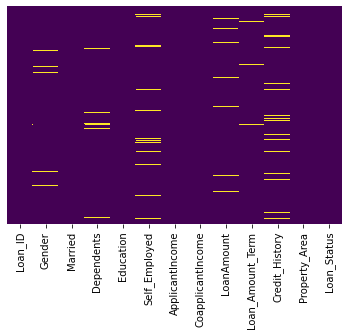

In [435]:
import seaborn as sns
sns.heatmap(data.isnull(),yticklabels=False, cbar=False, cmap='viridis')

In [436]:
data.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [437]:
#replace null value with mode
data['Gender'].fillna(data['Gender'].mode()[0], inplace=True)
data['Married'].fillna(data['Married'].mode()[0], inplace=True)
data['Dependents'].fillna(data['Dependents'].mode()[0], inplace=True)
data['Self_Employed'].fillna(data['Self_Employed'].mode()[0], inplace=True)
data['LoanAmount'].fillna(data['LoanAmount'].mode()[0], inplace=True)
data['Credit_History'].fillna(data['Credit_History'].mode()[0], inplace=True)
data['Loan_Amount_Term'].fillna(data['Loan_Amount_Term'].mode()[0], inplace=True)


In [438]:
data.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

<AxesSubplot:>

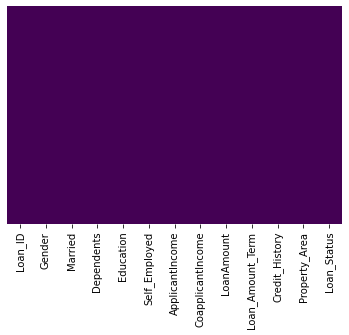

In [439]:
import seaborn as sns
sns.heatmap(data.isnull(),yticklabels=False, cbar=False, cmap='viridis')

In [440]:
data.shape

(614, 13)

In [441]:
data.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [442]:
#Categorical Data Visualization
data_visualization_nominal=data[['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status']].copy()

Male      502
Female    112
Name: Gender, dtype: int64


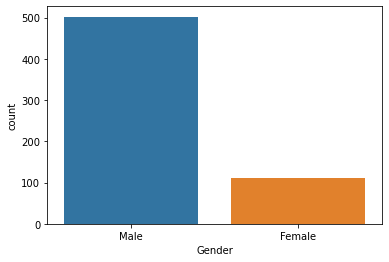

In [34]:
data=sns.countplot(x='Gender',data=data_visualization_nominal)
print(data_visualization_nominal['Gender'].value_counts())

Male      502
Female    112
Name: Gender, dtype: int64


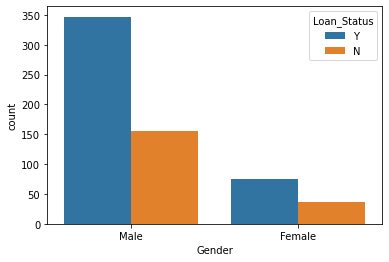

In [35]:
data=sns.countplot(x='Gender',hue='Loan_Status',data=data_visualization_nominal)
print(data_visualization_nominal['Gender'].value_counts())

Yes    401
No     213
Name: Married, dtype: int64


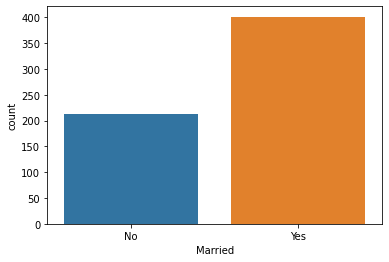

In [36]:
data=sns.countplot(x='Married',data=data_visualization_nominal)
print(data_visualization_nominal['Married'].value_counts())

Yes    401
No     213
Name: Married, dtype: int64


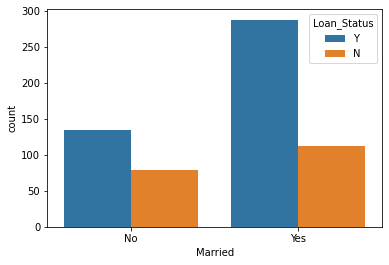

In [37]:
data=sns.countplot(x='Married',hue='Loan_Status',data=data_visualization_nominal)
print(data_visualization_nominal['Married'].value_counts())

Graduate        480
Not Graduate    134
Name: Education, dtype: int64


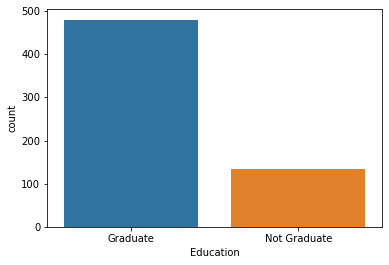

In [38]:
data=sns.countplot(x='Education',data=data_visualization_nominal)
print(data_visualization_nominal['Education'].value_counts())

Graduate        480
Not Graduate    134
Name: Education, dtype: int64


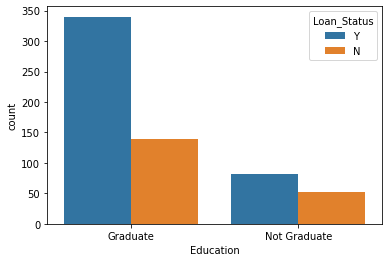

In [39]:
data=sns.countplot(x='Education',hue='Loan_Status',data=data_visualization_nominal)
print(data_visualization_nominal['Education'].value_counts())

No     532
Yes     82
Name: Self_Employed, dtype: int64


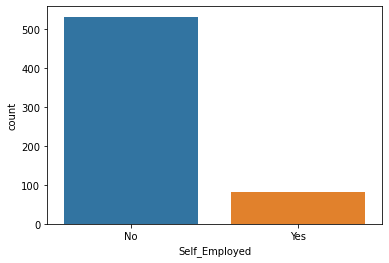

In [40]:
data=sns.countplot(x='Self_Employed',data=data_visualization_nominal)
print(data_visualization_nominal['Self_Employed'].value_counts())

No     532
Yes     82
Name: Self_Employed, dtype: int64


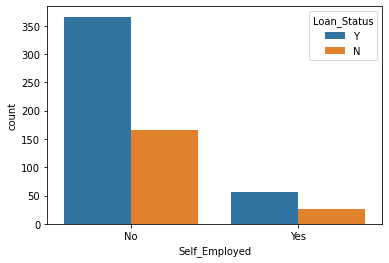

In [41]:
data=sns.countplot(x='Self_Employed',hue='Loan_Status',data=data_visualization_nominal)
print(data_visualization_nominal['Self_Employed'].value_counts())

Semiurban    233
Urban        202
Rural        179
Name: Property_Area, dtype: int64


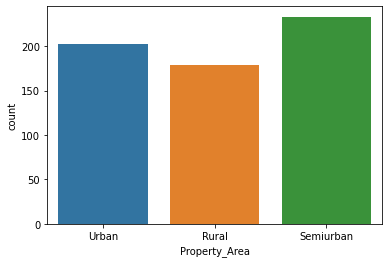

In [42]:
data=sns.countplot(x='Property_Area',data=data_visualization_nominal)
print(data_visualization_nominal['Property_Area'].value_counts())

Semiurban    233
Urban        202
Rural        179
Name: Property_Area, dtype: int64


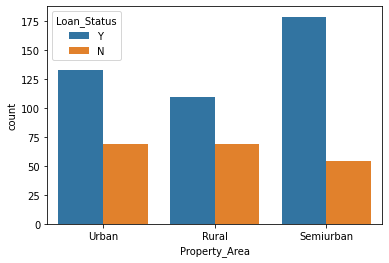

In [43]:
data=sns.countplot(x='Property_Area',hue='Loan_Status',data=data_visualization_nominal)
print(data_visualization_nominal['Property_Area'].value_counts())

Y    422
N    192
Name: Loan_Status, dtype: int64


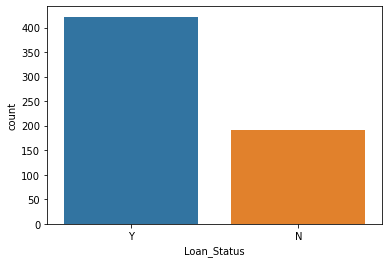

In [44]:
data=sns.countplot(x='Loan_Status',data=data_visualization_nominal)
print(data_visualization_nominal['Loan_Status'].value_counts())

Semiurban    233
Urban        202
Rural        179
Name: Property_Area, dtype: int64


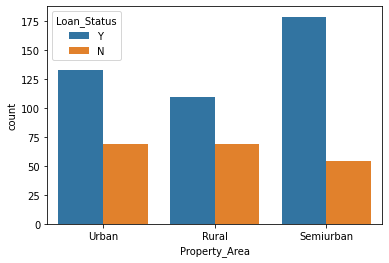

In [45]:
data=sns.countplot(x='Property_Area',hue='Loan_Status',data=data_visualization_nominal)
print(data_visualization_nominal['Property_Area'].value_counts())

<AxesSubplot:xlabel='Dependents', ylabel='Loan_Status'>

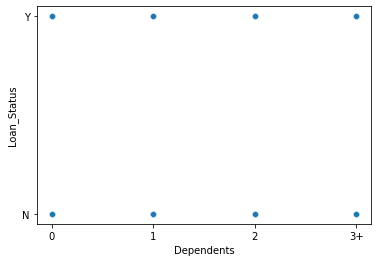

In [58]:
sns.scatterplot(x="Dependents",y='Loan_Status',data=data)

<AxesSubplot:xlabel='ApplicantIncome', ylabel='Loan_Status'>

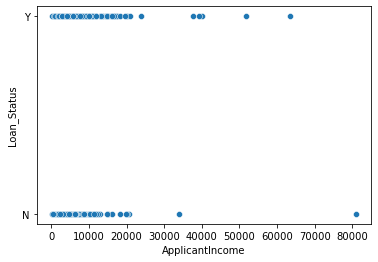

In [59]:
sns.scatterplot(x="ApplicantIncome",y='Loan_Status',data=data)

<AxesSubplot:xlabel='CoapplicantIncome', ylabel='Loan_Status'>

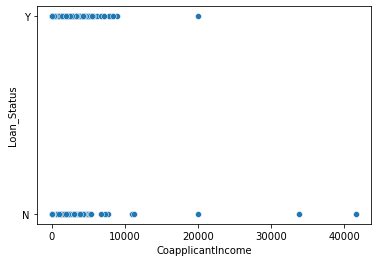

In [60]:
sns.scatterplot(x="CoapplicantIncome",y='Loan_Status',data=data)

<AxesSubplot:xlabel='LoanAmount', ylabel='Loan_Status'>

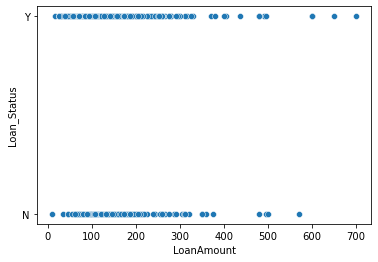

In [61]:
sns.scatterplot(x="LoanAmount",y='Loan_Status',data=data)

<AxesSubplot:xlabel='Loan_Amount_Term', ylabel='Loan_Status'>

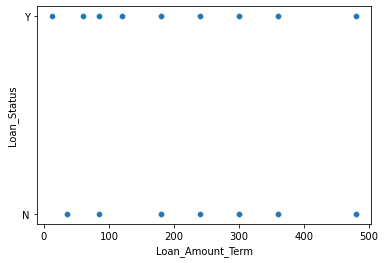

In [62]:
sns.scatterplot(x="Loan_Amount_Term",y='Loan_Status',data=data)

<AxesSubplot:xlabel='Credit_History', ylabel='Loan_Status'>

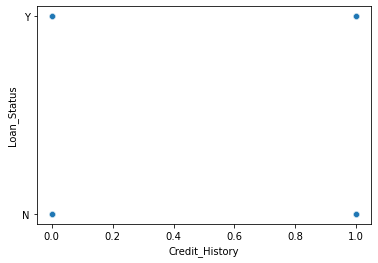

In [63]:
sns.scatterplot(x="Credit_History",y='Loan_Status',data=data)

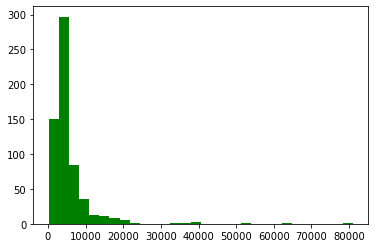

In [66]:
import matplotlib.pyplot as plt
plt.hist(data['ApplicantIncome'],color='green',bins=30)
plt.show()

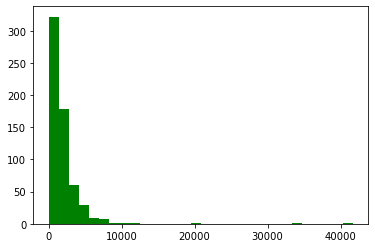

In [67]:
import matplotlib.pyplot as plt
plt.hist(data['CoapplicantIncome'],color='green',bins=30)
plt.show()

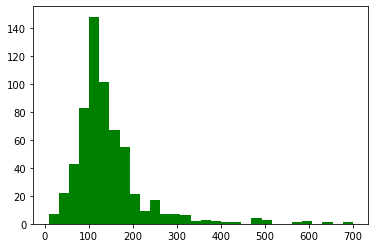

In [68]:
plt.hist(data['LoanAmount'],color='green',bins=30)
plt.show()

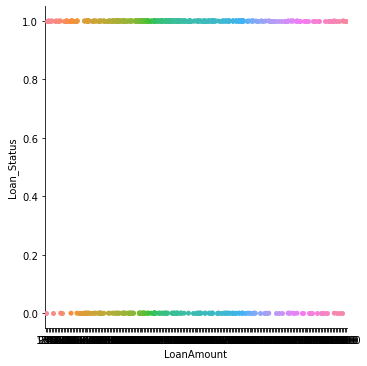

In [89]:
sns.catplot(x='LoanAmount',y='Loan_Status',data=data)

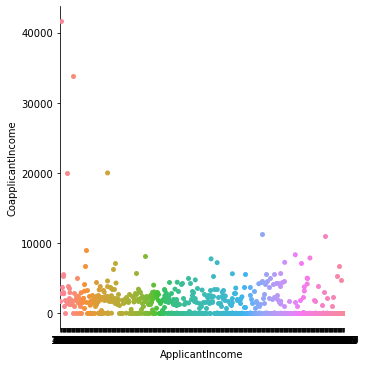

In [91]:
sns.catplot(x="ApplicantIncome",y="CoapplicantIncome",data=data)

In [96]:
data_visualization_continuous=data[['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status']].copy()

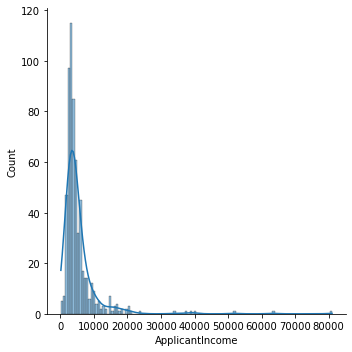

In [97]:
sns.displot(data_visualization_continuous['ApplicantIncome'],kde=True)

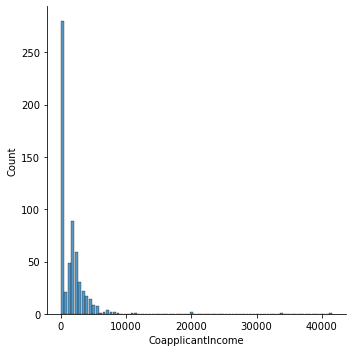

In [98]:
sns.displot(data, x="CoapplicantIncome", shrink=.8)

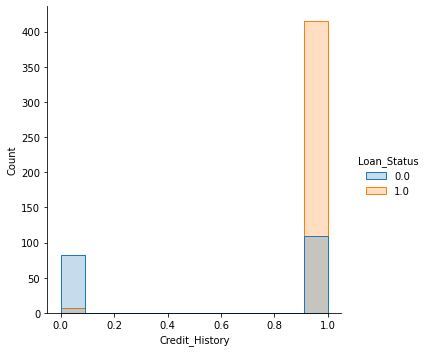

In [99]:
sns.displot(data, x="Credit_History", hue="Loan_Status", element="step")


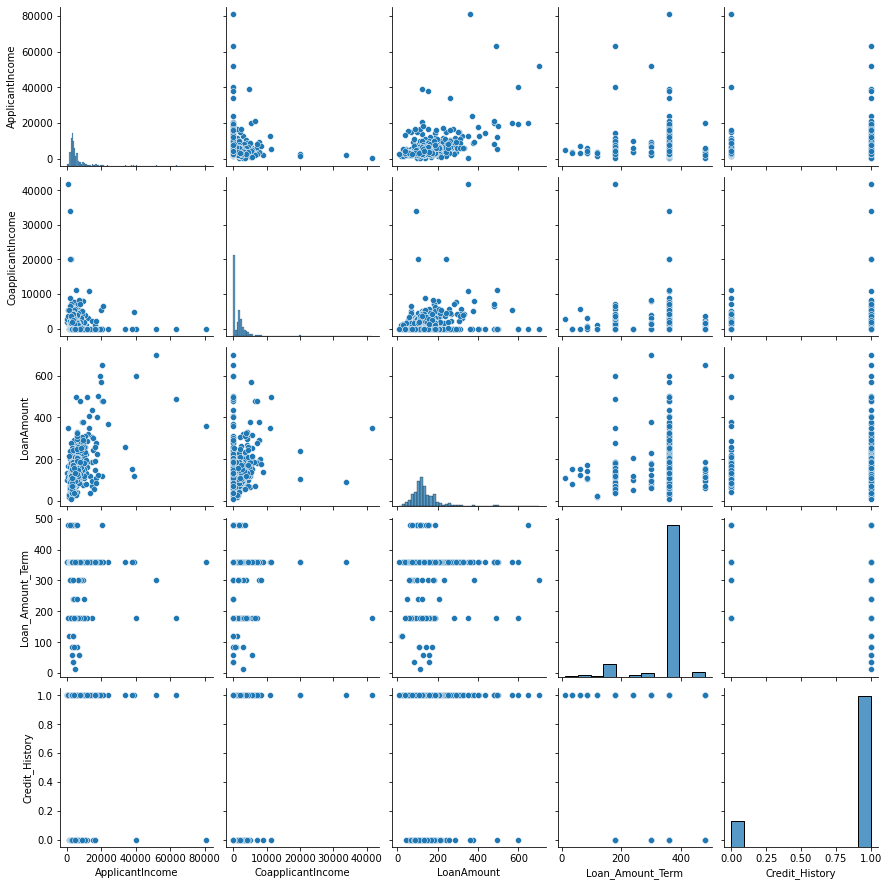

In [71]:
sns.pairplot(data)

In [443]:
type(data)

pandas.core.frame.DataFrame

In [444]:
#encoding dataframe
from sklearn.preprocessing import OrdinalEncoder
data_1=OrdinalEncoder()
for i in data.columns:
    if data[i].dtypes=='object':
        data[i]=data_1.fit_transform(data[i].values.reshape(-1,1))
data

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,0.0,1.0,0.0,0.0,0.0,0.0,5849,0.0,120.0,360.0,1.0,2.0,1.0
1,1.0,1.0,1.0,1.0,0.0,0.0,4583,1508.0,128.0,360.0,1.0,0.0,0.0
2,2.0,1.0,1.0,0.0,0.0,1.0,3000,0.0,66.0,360.0,1.0,2.0,1.0
3,3.0,1.0,1.0,0.0,1.0,0.0,2583,2358.0,120.0,360.0,1.0,2.0,1.0
4,4.0,1.0,0.0,0.0,0.0,0.0,6000,0.0,141.0,360.0,1.0,2.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,609.0,0.0,0.0,0.0,0.0,0.0,2900,0.0,71.0,360.0,1.0,0.0,1.0
610,610.0,1.0,1.0,3.0,0.0,0.0,4106,0.0,40.0,180.0,1.0,0.0,1.0
611,611.0,1.0,1.0,1.0,0.0,0.0,8072,240.0,253.0,360.0,1.0,2.0,1.0
612,612.0,1.0,1.0,2.0,0.0,0.0,7583,0.0,187.0,360.0,1.0,2.0,1.0


In [445]:
data.describe()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
count,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000
mean,306.500000,0.817590,0.653094,0.744300,0.218241,0.133550,5403.459283,1621.245798,145.465798,342.410423,0.855049,1.037459,0.687296
std,177.390811,0.386497,0.476373,1.009623,0.413389,0.340446,6109.041673,2926.248369,84.180967,64.428629,0.352339,0.787482,0.463973
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,150.000000,0.000000,9.000000,12.000000,0.000000,0.000000,0.000000
25%,153.250000,1.000000,0.000000,0.000000,0.000000,0.000000,2877.500000,0.000000,100.250000,360.000000,1.000000,0.000000,0.000000
50%,306.500000,1.000000,1.000000,0.000000,0.000000,0.000000,3812.500000,1188.500000,125.000000,360.000000,1.000000,1.000000,1.000000
75%,459.750000,1.000000,1.000000,1.000000,0.000000,0.000000,5795.000000,2297.250000,164.750000,360.000000,1.000000,2.000000,1.000000
max,613.000000,1.000000,1.000000,3.000000,1.000000,1.000000,81000.000000,41667.000000,700.000000,480.000000,1.000000,2.000000,1.000000


<AxesSubplot:>

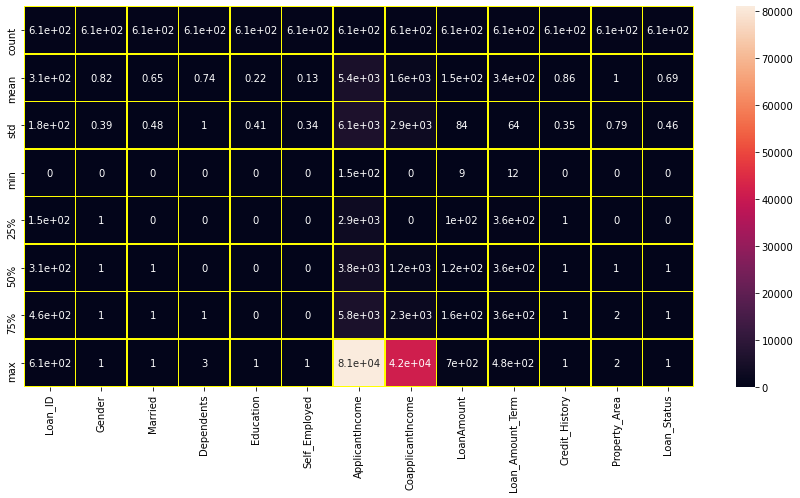

In [446]:
plt.figure(figsize=(15,7))
sns.heatmap(data.describe(), annot=True, linewidth=.5,linecolor='yellow')

In [447]:
data.corr()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
Loan_ID,1.000000,-0.028029,-0.016013,0.051559,0.039442,0.032874,0.016925,0.039211,0.037369,-0.033028,-0.030603,-0.155416,0.011773
Gender,-0.028029,1.000000,0.364569,0.172914,0.045364,-0.000525,0.058809,0.082912,0.106404,-0.074030,0.009170,-0.025752,0.017987
Married,-0.016013,0.364569,1.000000,0.334216,0.012304,0.004489,0.051708,0.075948,0.146212,-0.100912,0.010938,0.004257,0.091478
Dependents,0.051559,0.172914,0.334216,1.000000,0.055752,0.056798,0.118202,0.030430,0.163017,-0.103864,-0.040160,-0.000244,0.010118
Education,0.039442,0.045364,0.012304,0.055752,1.000000,-0.010383,-0.140760,-0.062290,-0.169436,-0.073928,-0.073658,-0.065243,-0.085884
Self_Employed,0.032874,-0.000525,0.004489,0.056798,-0.010383,1.000000,0.127180,-0.016100,0.114971,-0.033739,-0.001550,-0.030860,-0.003700
ApplicantIncome,0.016925,0.058809,0.051708,0.118202,-0.140760,0.127180,1.000000,-0.116605,0.564698,-0.046531,-0.018615,-0.009500,-0.004710
CoapplicantIncome,0.039211,0.082912,0.075948,0.030430,-0.062290,-0.016100,-0.116605,1.000000,0.189723,-0.059383,0.011134,0.010522,-0.059187
LoanAmount,0.037369,0.106404,0.146212,0.163017,-0.169436,0.114971,0.564698,0.189723,1.000000,0.037152,-0.000250,-0.047414,-0.031808
Loan_Amount_Term,-0.033028,-0.074030,-0.100912,-0.103864,-0.073928,-0.033739,-0.046531,-0.059383,0.037152,1.000000,-0.004705,-0.076120,-0.022549


In [448]:
data.corr()['Loan_Status'].sort_values()

Education           -0.085884
CoapplicantIncome   -0.059187
LoanAmount          -0.031808
Loan_Amount_Term    -0.022549
ApplicantIncome     -0.004710
Self_Employed       -0.003700
Dependents           0.010118
Loan_ID              0.011773
Gender               0.017987
Property_Area        0.032112
Married              0.091478
Credit_History       0.540556
Loan_Status          1.000000
Name: Loan_Status, dtype: float64

<AxesSubplot:>

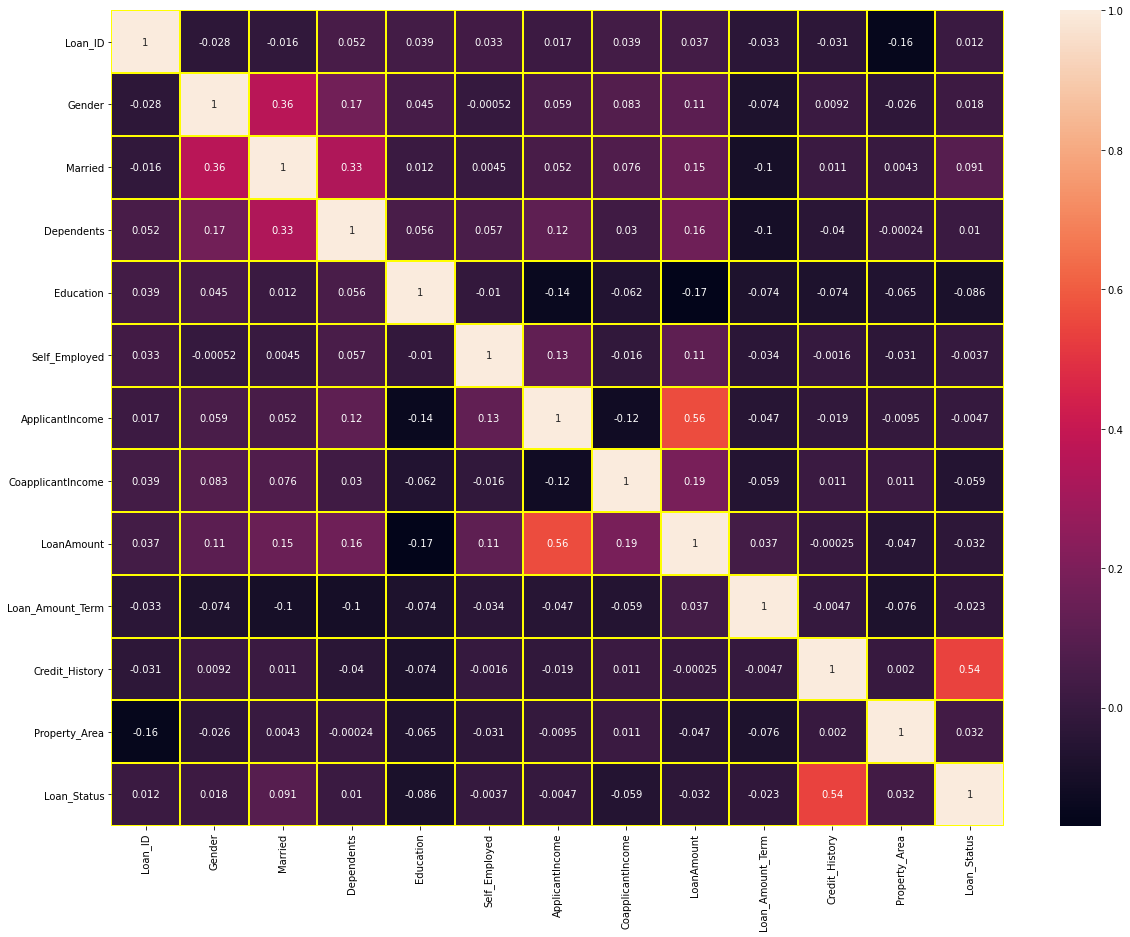

In [449]:
plt.figure(figsize=(20,15))
sns.heatmap(data.corr(), annot=True, linewidth=1,linecolor='yellow')

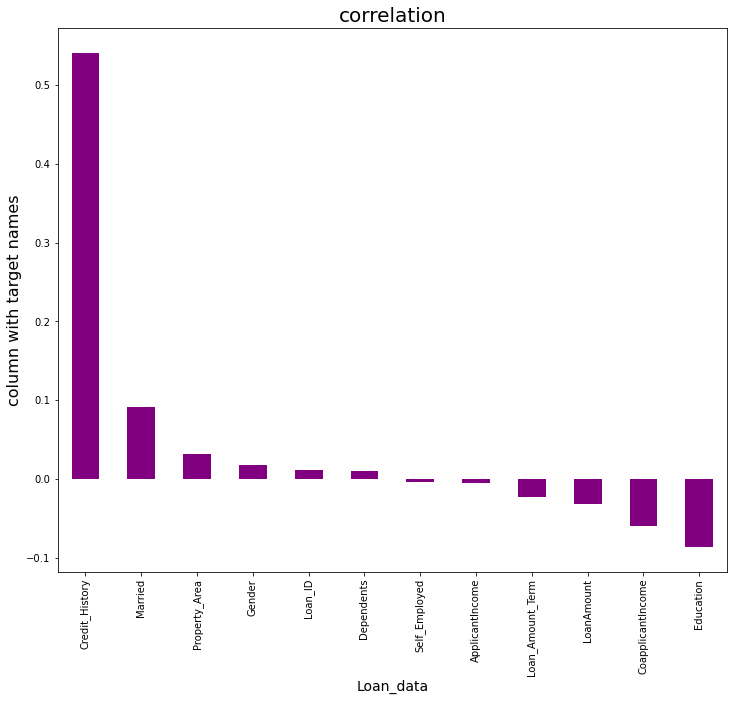

In [450]:
plt.figure(figsize=(12,10))
data.corr()['Loan_Status'].sort_values(ascending=False).drop(['Loan_Status']).plot(kind='bar',color='purple')
plt.xlabel('Loan_data',fontsize=14)
plt.ylabel('column with target names',fontsize=16)
plt.title('correlation',fontsize=20)
plt.show()

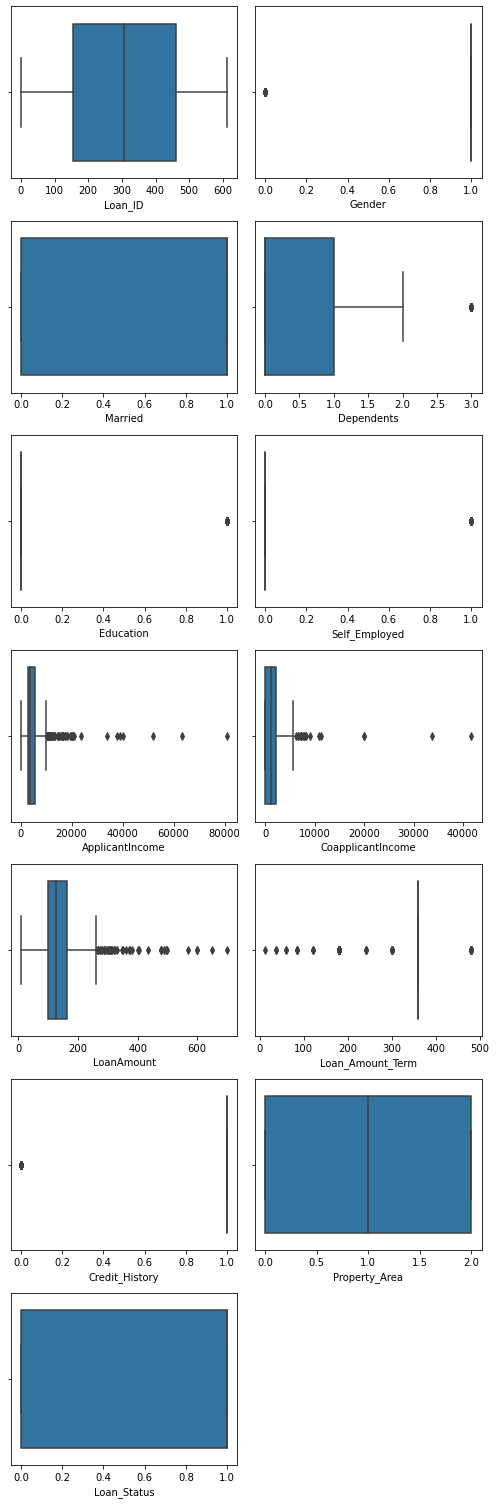

In [451]:
#to check outliers
import warnings
warnings.filterwarnings("ignore")
collist=data.columns.values
ncol=2
nrows=7
plt.figure(figsize=(nrows,3*nrows))
for i in range(0,len(collist)):
    plt.subplot(nrows,ncol,i+1)
    sns.boxplot(data[collist[i]])
    plt.tight_layout()

In [452]:
from scipy.stats import zscore
import numpy as np
z=np.abs(zscore(data))
threshold=3
np.where(z>3)

(array([  9,  14,  68,  94, 126, 130, 133, 155, 155, 171, 171, 177, 177,
        183, 185, 242, 262, 278, 308, 313, 333, 333, 369, 402, 409, 417,
        432, 443, 487, 495, 497, 506, 523, 525, 546, 561, 575, 581, 585,
        600, 604]),
 array([7, 9, 9, 9, 6, 8, 9, 6, 8, 6, 8, 7, 8, 6, 6, 9, 9, 8, 8, 9, 6, 8,
        8, 7, 6, 7, 8, 6, 8, 9, 9, 8, 8, 8, 9, 8, 9, 7, 9, 7, 8]))

In [453]:
np.abs(zscore(data))<0

array([[False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       ...,
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False]])

In [454]:
data_1=data[(z<3).all(axis=1)]
data_1

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,0.0,1.0,0.0,0.0,0.0,0.0,5849,0.0,120.0,360.0,1.0,2.0,1.0
1,1.0,1.0,1.0,1.0,0.0,0.0,4583,1508.0,128.0,360.0,1.0,0.0,0.0
2,2.0,1.0,1.0,0.0,0.0,1.0,3000,0.0,66.0,360.0,1.0,2.0,1.0
3,3.0,1.0,1.0,0.0,1.0,0.0,2583,2358.0,120.0,360.0,1.0,2.0,1.0
4,4.0,1.0,0.0,0.0,0.0,0.0,6000,0.0,141.0,360.0,1.0,2.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,609.0,0.0,0.0,0.0,0.0,0.0,2900,0.0,71.0,360.0,1.0,0.0,1.0
610,610.0,1.0,1.0,3.0,0.0,0.0,4106,0.0,40.0,180.0,1.0,0.0,1.0
611,611.0,1.0,1.0,1.0,0.0,0.0,8072,240.0,253.0,360.0,1.0,2.0,1.0
612,612.0,1.0,1.0,2.0,0.0,0.0,7583,0.0,187.0,360.0,1.0,2.0,1.0


In [455]:
#to know the percentage loss
loss_data=((614-577)/614)*100
loss_data

6.026058631921824

In [456]:
data.skew().sort_values()

Loan_Amount_Term    -2.402112
Credit_History      -2.021971
Gender              -1.648795
Loan_Status         -0.809998
Married             -0.644850
Property_Area       -0.066196
Loan_ID              0.000000
Dependents           1.015551
Education            1.367622
Self_Employed        2.159796
LoanAmount           2.745407
ApplicantIncome      6.539513
CoapplicantIncome    7.491531
dtype: float64

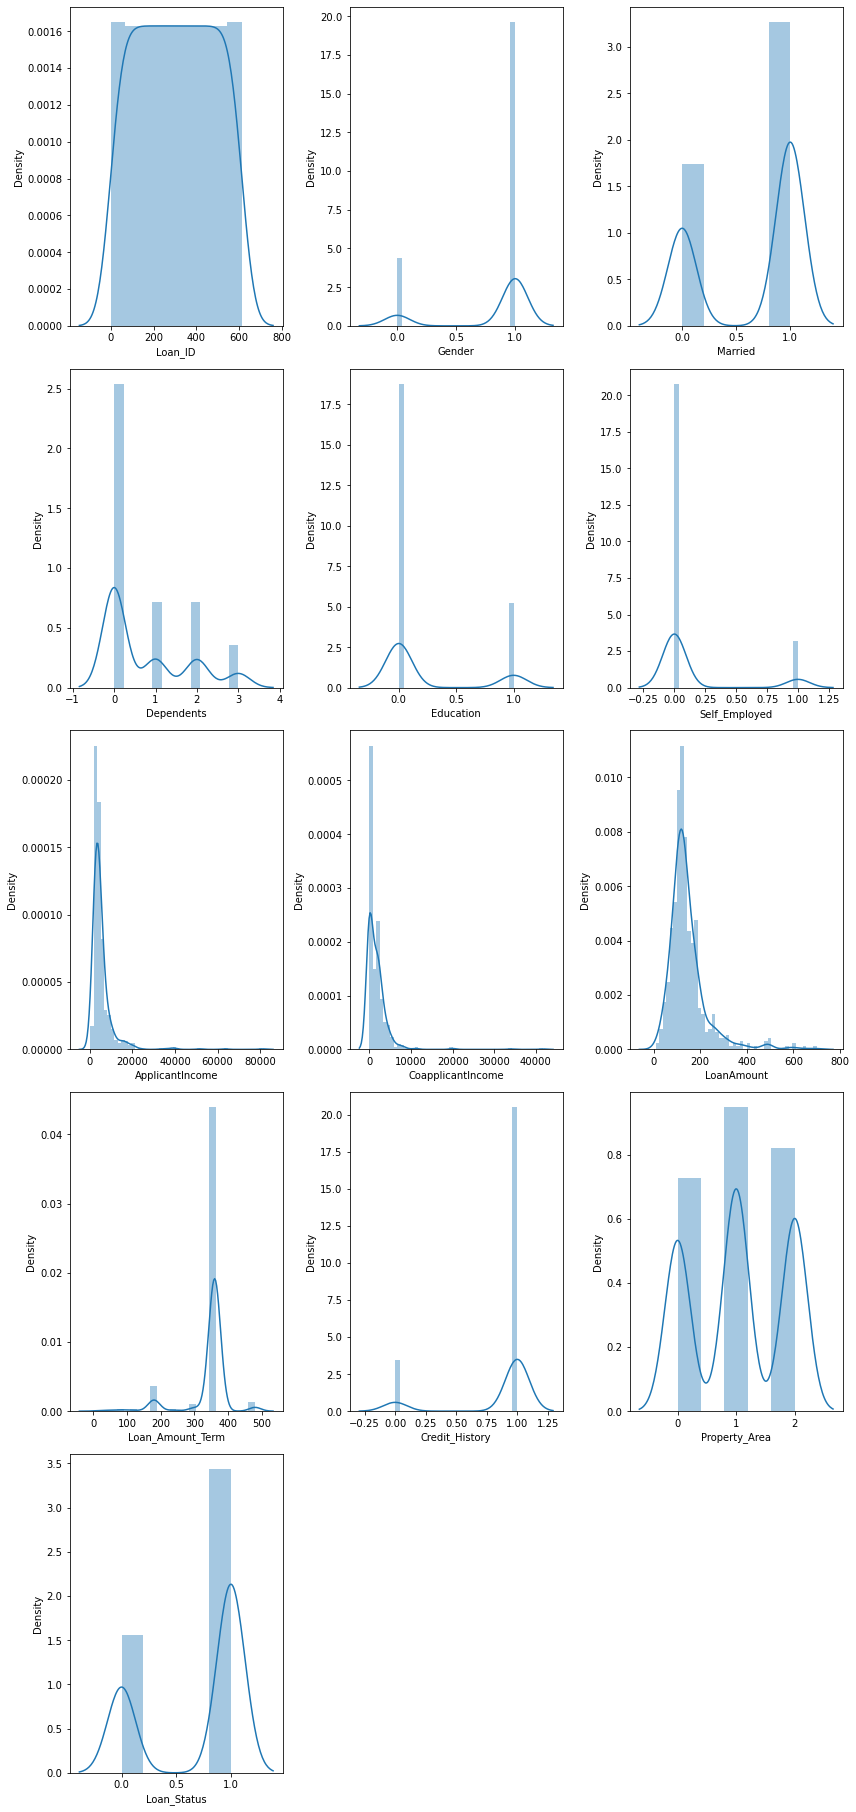

In [457]:
#distribution plot to check skewness
collist=data.columns.values
ncol=3
nrows=12
plt.figure(figsize=(nrows,5*nrows))
for i in range(0,len(collist)):
    plt.subplot(nrows,ncol,i+1)
    sns.distplot(data[collist[i]])
    plt.tight_layout()

In [458]:
from scipy import stats

In [459]:
def diagnostic_plots(data,variable):
    plt.figure(figsize=(15,6))
    plt.subplot(1,2,1)
    data[variable].hist()
    
    plt.subplot(1,2,2)
    stats.probplot(data[variable],dist="norm",plot=plt)
    plt.show()

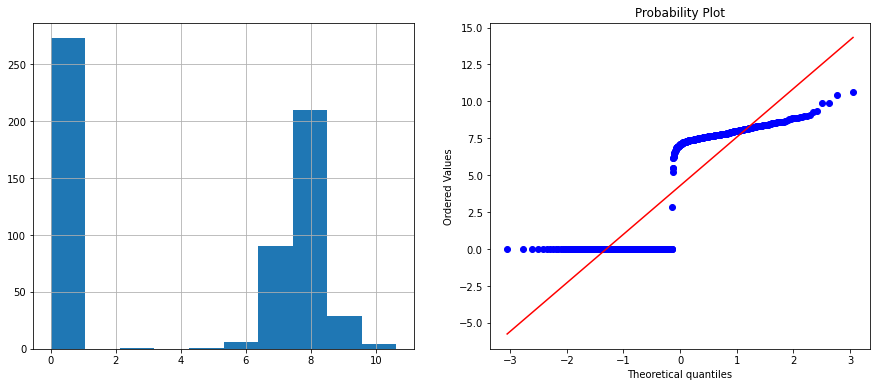

In [460]:
data['CoapplicantIncome']=np.log(data['CoapplicantIncome']+1)
diagnostic_plots(data,'CoapplicantIncome')

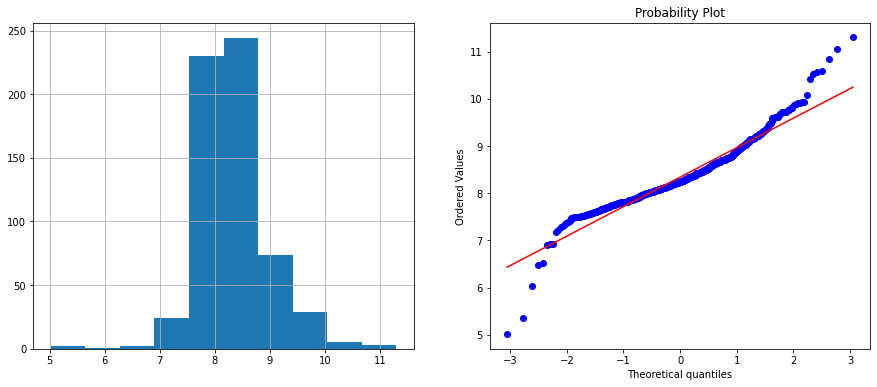

In [461]:
data['ApplicantIncome']=np.log(data['ApplicantIncome']+1)
diagnostic_plots(data,'ApplicantIncome')

In [462]:
data.skew().sort_values()

Loan_Amount_Term    -2.402112
Credit_History      -2.021971
Gender              -1.648795
Loan_Status         -0.809998
Married             -0.644850
CoapplicantIncome   -0.173073
Property_Area       -0.066196
Loan_ID              0.000000
ApplicantIncome      0.482128
Dependents           1.015551
Education            1.367622
Self_Employed        2.159796
LoanAmount           2.745407
dtype: float64

In [463]:
x=data_1.iloc[:,:-1]
y=data_1.iloc[:,-1]

In [464]:
from sklearn.preprocessing import power_transform
x=power_transform(x,method='yeo-johnson')
x

array([[-2.15916611,  0.47713685, -1.36251079, ...,  0.13078824,
         0.41851254,  1.1948064 ],
       [-2.13342327,  0.47713685,  0.73393914, ...,  0.13078824,
         0.41851254, -1.34019905],
       [-2.11139231,  0.47713685,  0.73393914, ...,  0.13078824,
         0.41851254,  1.1948064 ],
       ...,
       [ 1.55825237,  0.47713685,  0.73393914, ...,  0.13078824,
         0.41851254,  1.1948064 ],
       [ 1.56257804,  0.47713685,  0.73393914, ...,  0.13078824,
         0.41851254,  1.1948064 ],
       [ 1.56690162, -2.09583477, -1.36251079, ...,  0.13078824,
        -2.38941464,  0.01546372]])

In [465]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x=sc.fit_transform(x)
x

array([[-2.15916611,  0.47713685, -1.36251079, ...,  0.13078824,
         0.41851254,  1.1948064 ],
       [-2.13342327,  0.47713685,  0.73393914, ...,  0.13078824,
         0.41851254, -1.34019905],
       [-2.11139231,  0.47713685,  0.73393914, ...,  0.13078824,
         0.41851254,  1.1948064 ],
       ...,
       [ 1.55825237,  0.47713685,  0.73393914, ...,  0.13078824,
         0.41851254,  1.1948064 ],
       [ 1.56257804,  0.47713685,  0.73393914, ...,  0.13078824,
         0.41851254,  1.1948064 ],
       [ 1.56690162, -2.09583477, -1.36251079, ...,  0.13078824,
        -2.38941464,  0.01546372]])

In [466]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
lr=LogisticRegression()
predictions=log_reg.predict(x_test)
predictions

array([0., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1.,
       1., 1., 1., 1., 1., 1., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 0.,
       1., 1., 1., 1., 1., 1., 1., 0., 1., 0., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 0., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 0., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 0., 0., 1.])

In [469]:
from sklearn.preprocessing import scale
s=scale(x)
s_train,s_test,y_train,y_test=train_test_split(s,y,random_state=821,test_size=0.25)
lr_2=lr.fit(s_train,y_train)
print('Scaled Logistic Regression score for test set: %f' % lr_2.score(s_test, y_test))
y_true, y_pred = y_test, lr_2.predict(s_test)
print(classification_report(y_true, y_pred))

Scaled Logistic Regression score for test set: 0.800000
              precision    recall  f1-score   support

         0.0       0.91      0.44      0.59        48
         1.0       0.78      0.98      0.87        97

    accuracy                           0.80       145
   macro avg       0.85      0.71      0.73       145
weighted avg       0.82      0.80      0.78       145



In [470]:
from sklearn.metrics import classification_report

print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

         0.0       0.41      0.15      0.22        48
         1.0       0.68      0.90      0.77        97

    accuracy                           0.65       145
   macro avg       0.55      0.52      0.49       145
weighted avg       0.59      0.65      0.59       145



In [471]:
maxAccu=0
minRs=0
for i in range(0,100):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=i)
    lr.fit(x_train,y_train)
    predict=lr.predict(x_test)
    acc=accuracy_score(y_test,predict)
    
    if acc>maxAccu:
        maxAccu=acc
        maxRs=i
    print("Best Accuracy is:-",maxAccu,"on random state",maxRs)

Best Accuracy is:- 0.8137931034482758 on random state 0
Best Accuracy is:- 0.8275862068965517 on random state 1
Best Accuracy is:- 0.8275862068965517 on random state 1
Best Accuracy is:- 0.8275862068965517 on random state 1
Best Accuracy is:- 0.8275862068965517 on random state 1
Best Accuracy is:- 0.8275862068965517 on random state 1
Best Accuracy is:- 0.8275862068965517 on random state 1
Best Accuracy is:- 0.8275862068965517 on random state 1
Best Accuracy is:- 0.8275862068965517 on random state 1
Best Accuracy is:- 0.8275862068965517 on random state 1
Best Accuracy is:- 0.8275862068965517 on random state 1
Best Accuracy is:- 0.8275862068965517 on random state 1
Best Accuracy is:- 0.896551724137931 on random state 12
Best Accuracy is:- 0.896551724137931 on random state 12
Best Accuracy is:- 0.896551724137931 on random state 12
Best Accuracy is:- 0.896551724137931 on random state 12
Best Accuracy is:- 0.896551724137931 on random state 12
Best Accuracy is:- 0.896551724137931 on random s

In [472]:
from sklearn.metrics import confusion_matrix,classification_report
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=670)
print("Accuracy",accuracy_score(y_test,predict)*100)
print(classification_report(y_test,predict))
print(confusion_matrix(y_test,predict))


Accuracy 66.20689655172414
              precision    recall  f1-score   support

         0.0       0.32      0.17      0.22        41
         1.0       0.72      0.86      0.78       104

    accuracy                           0.66       145
   macro avg       0.52      0.51      0.50       145
weighted avg       0.61      0.66      0.63       145

[[ 7 34]
 [15 89]]


In [473]:
from sklearn.tree import DecisionTreeClassifier

dtc=DecisionTreeClassifier()
dtc.fit(x_test,y_test)
preddtc=dtc.predict(x_test)
print("Accuracy",accuracy_score(y_test,predict)*100)
print(classification_report(y_test,predict))
print(confusion_matrix(y_test,predict))


Accuracy 66.20689655172414
              precision    recall  f1-score   support

         0.0       0.32      0.17      0.22        41
         1.0       0.72      0.86      0.78       104

    accuracy                           0.66       145
   macro avg       0.52      0.51      0.50       145
weighted avg       0.61      0.66      0.63       145

[[ 7 34]
 [15 89]]


In [474]:
from sklearn.ensemble import RandomForestClassifier

rfc=RandomForestClassifier()
rfc.fit(x_test,y_test)
predrfc=rfc.predict(x_test)
print("Accuracy",accuracy_score(y_test,predict)*100)
print(classification_report(y_test,predict))
print(confusion_matrix(y_test,predict))


Accuracy 66.20689655172414
              precision    recall  f1-score   support

         0.0       0.32      0.17      0.22        41
         1.0       0.72      0.86      0.78       104

    accuracy                           0.66       145
   macro avg       0.52      0.51      0.50       145
weighted avg       0.61      0.66      0.63       145

[[ 7 34]
 [15 89]]


In [475]:
from sklearn.svm import SVC
svc=SVC()
svc.fit(x_train,y_train)
predsvc=svc.predict(x_test)
print("Accuracy",accuracy_score(y_test,predsvc)*100)
print(classification_report(y_test,predsvc))
print(confusion_matrix(y_test,predsvc))


Accuracy 82.75862068965517
              precision    recall  f1-score   support

         0.0       0.94      0.41      0.58        41
         1.0       0.81      0.99      0.89       104

    accuracy                           0.83       145
   macro avg       0.88      0.70      0.73       145
weighted avg       0.85      0.83      0.80       145

[[ 17  24]
 [  1 103]]


In [476]:
from sklearn.model_selection import cross_val_score
scr=cross_val_score(lr,x,y,cv=10)
print("Cv score of logistic Regression Model is:-",scr.mean()*100)

Cv score of logistic Regression Model is:- 81.81488203266788


In [477]:
from sklearn.model_selection import cross_val_score
scr=cross_val_score(dtc,x,y,cv=10)
print("Cv score of Decision Tree Classifier is:-",scr.mean()*100)

Cv score of Decision Tree Classifier is:- 69.34361766485179


In [478]:
from sklearn.model_selection import cross_val_score
scr=cross_val_score(rfc,x,y,cv=10)
print("Cv score of Random Forest Classifier is:-",scr.mean()*100)

Cv score of Random Forest Classifier is:- 75.60193587416816


In [496]:
pred_lr=lr.predict(x_test)
lss=accuracy_score(y_test,pred_lr)
lss_score=cross_val_score(lr,x,y,cv=10).mean()
print("The CV score is: ",lss_score,"\nThe accuracy score is:",lss)

The CV score is:  0.8181488203266788 
The accuracy score is: 0.8275862068965517


In [497]:
from sklearn.model_selection import GridSearchCV
parameters={'max_features':['auto','sqrt','log2'],
     'max_depth':[4,5,6,7,8],
           'criterion':['gini','entropy']}

gcv=GridSearchCV(rfc,parameters,cv=5,scoring='accuracy')
gcv.fit(x_train,y_train)
gcv.best_params_



{'criterion': 'gini', 'max_depth': 4, 'max_features': 'auto'}

In [498]:
gcv_pred=gcv.best_estimator_.predict(x_test)
accuracy_score(y_test,gcv_pred)*100

82.06896551724138

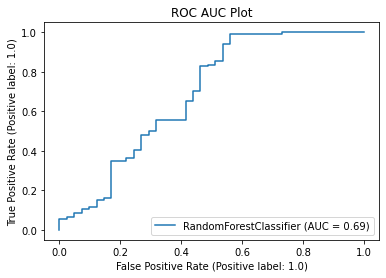

In [499]:
from sklearn.metrics import plot_roc_curve
plot_roc_curve(gcv.best_estimator_,x_test,y_test)
plt.title("ROC AUC Plot")
plt.show()

In [500]:
import joblib
joblib.dump(gcv.best_estimator_,"Loan Application")

['Loan Application']

In [501]:
import numpy as np
a=np.array(y_test)
predicted=np.array(lr.predict(x_test))
data_com=pd.DataFrame({'original':a,'predicted':predicted},index=range(len(a)))
data_com

,original,predicted
0,0.0,0.0
1,1.0,1.0
2,1.0,1.0
3,1.0,1.0
4,1.0,1.0
...,...,...
140,1.0,1.0
141,1.0,1.0
142,0.0,0.0
143,0.0,0.0
